In [1]:
%load_ext jupyter_black

### MULTI-RADAR/MULTI-SENSOR SYSTEM (MRMS)

The MRMS system was developed to produce severe weather, transportation, and precipitation products for improved decision-making capability to improve hazardous weather forecasts and warnings, along with hydrology, aviation, and numerical weather prediction.

MRMS is a system with fully-automated algorithms that quickly and intelligently integrate data streams from multiple radars, surface and upper air observations, lightning detection systems, satellite observations, and forecast models. Numerous two-dimensional multiple-sensor products offer assistance for hail, wind, tornado, quantitative precipitation estimations, convection, icing, and turbulence diagnosis.

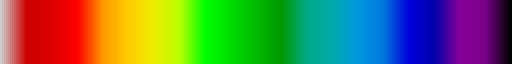

In [9]:
import numpy as np
import pandas as pd
import xarray as xr

# plotting
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.get_cmap("nipy_spectral_r")

## open MRMS QPE grib file

Quantitative precipitation estimation or QPE is a method of approximating the amount of precipitation that has fallen at a location or across a region.grib2 data

In [11]:
ds: xr.Dataset = xr.open_dataset(
    "/workspaces/sppp/data/grib/MultiSensor_QPE_01H_Pass2_00.00_20220719-000000.grib2",
    engine="cfgrib",
)
qpe: xr.DataArray = ds["unknown"]
qpe

<xarray.DataArray 'unknown' (latitude: 3500, longitude: 7000)>
[24500000 values with dtype=float32]
Coordinates:
    time            datetime64[ns] ...
    step            timedelta64[ns] ...
    heightAboveSea  float64 ...
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      datetime64[ns] ...
Attributes:
    GRIB_paramId:                             0
    GRIB_dataType:                            ra
    GRIB_numberOfPoints:                      24500000
    GRIB_typeOfLevel:                         heightAboveSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  7000
    GRIB_Ny:                                  3500
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           unknown
    GRIB_gridDefinitionDescription:           Latitude/longitude 
    GRIB_iDirectionIncrementInDegrees:        0.01
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.01
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   54.995
    GRIB_latitudeOfLastGridPointInDegrees:    20.005001
    GRIB_longitudeOfFirstGridPointInDegrees:  230.005
    GRIB_longitudeOfLastGridPointInDegrees:   299.994998
    GRIB_missingValue:                        9999
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

## plot QPE

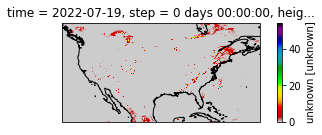

In [12]:
ax = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines("50m")
qpe.plot(ax=ax, cmap=plt.get_cmap("nipy_spectral_r"))

In [4]:
lat, lon = (ds.coords[x].to_numpy() for x in ("latitude", "longitude"))
lon

array([230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
       299.994998])

In [5]:
# Longitude conversion 0~360 to -180~180
lon = (lon + 180) % 360 - 180
lon

array([-129.995   , -129.985   , -129.975   , ...,  -60.025002,
        -60.015002,  -60.005002])

In [6]:
lat

array([54.995, 54.985, 54.975, ..., 20.025, 20.015, 20.005])

In [7]:
np.meshgrid(lat, lon, indexing="ij")

[array([[54.995, 54.995, 54.995, ..., 54.995, 54.995, 54.995],
        [54.985, 54.985, 54.985, ..., 54.985, 54.985, 54.985],
        [54.975, 54.975, 54.975, ..., 54.975, 54.975, 54.975],
        ...,
        [20.025, 20.025, 20.025, ..., 20.025, 20.025, 20.025],
        [20.015, 20.015, 20.015, ..., 20.015, 20.015, 20.015],
        [20.005, 20.005, 20.005, ..., 20.005, 20.005, 20.005]]),
 array([[-129.995   , -129.985   , -129.975   , ...,  -60.025002,
          -60.015002,  -60.005002],
        [-129.995   , -129.985   , -129.975   , ...,  -60.025002,
          -60.015002,  -60.005002],
        [-129.995   , -129.985   , -129.975   , ...,  -60.025002,
          -60.015002,  -60.005002],
        ...,
        [-129.995   , -129.985   , -129.975   , ...,  -60.025002,
          -60.015002,  -60.005002],
        [-129.995   , -129.985   , -129.975   , ...,  -60.025002,
          -60.015002,  -60.005002],
        [-129.995   , -129.985   , -129.975   , ...,  -60.025002,
          -60.0150